# Planet Amazon Image Classification

The labels can broadly be broken into three groups: atmospheric conditions, common land cover/land use phenomena, and rare land cover/land use phenomena. Each chip will have one and potentially more than one atmospheric label and zero or more common and rare labels.
The common labels in this data set are rainforest, agriculture, rivers, towns/cities, and roads. The overwhelming majority of the data set is labeled as "primary"

## Importing the Data

In [1]:
#import modules
import numpy as np 
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Define files and directories
os.chdir('C:/Users/isado/Documents/SpringBoard/Capstone2/')
         
# Create DataFrame with training labels
train_labels = pd.read_csv('./train_classes.csv')


In [2]:
##Extract unique labels
labels = []

for tags in train_labels.tags.values:
    label = tags.split(' ')
    for subitem in label:
        if subitem not in labels:
            labels.append(subitem)

#Create dummy variables
for label in labels:
    train_labels[label] = train_labels['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
    
train_labels

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,train_40474,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40475,train_40475,cloudy,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
40476,train_40476,agriculture clear primary,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40477,train_40477,agriculture clear primary road,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [3]:
def progressbar(it, prefix="", size=60, file=sys.stdout):
    count = len(it)
    def show(j):
        x = int(size*j/count)
        file.write("%s[%s%s] %i/%i\r" % (prefix, "#"*x, "."*(size-x), j, count))
        file.flush()        
    show(0)
    for i, item in enumerate(it):
        yield item
        show(i+1)
    file.write("\n")

In [4]:
#Inspecting training labels
train_labels.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [5]:
#Extract unique labels
labels = []

for tags in train_labels.tags.values:
    label = tags.split(' ')
    for subitem in label:
        if subitem not in labels:
            labels.append(subitem)
print('Possible labels:\n', labels)

Possible labels:
 ['haze', 'primary', 'agriculture', 'clear', 'water', 'habitation', 'road', 'cultivation', 'slash_burn', 'cloudy', 'partly_cloudy', 'conventional_mine', 'bare_ground', 'artisinal_mine', 'blooming', 'selective_logging', 'blow_down']


The labels can broadly be broken into three groups: atmospheric conditions, common land cover/land use phenomena, and rare land cover/land use phenomena

In [6]:
atmospheric_labels = ['haze', 'clear', 'cloudy', 'partly_cloudy']
common_land_labels = ['primary', 'agriculture','water','road', 'cultivation','habitation', 'bare_ground']
rare_land_labels = ['selective_logging', 'slash_burn', 'blooming', 'blow_down', 'conventional_mine', 'artisinal_mine']

In [6]:
for label in labels:
    train_labels[label] = train_labels['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
    
train_labels   

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,train_40474,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40475,train_40475,cloudy,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
40476,train_40476,agriculture clear primary,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
40477,train_40477,agriculture clear primary road,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0


## Exploring the Data

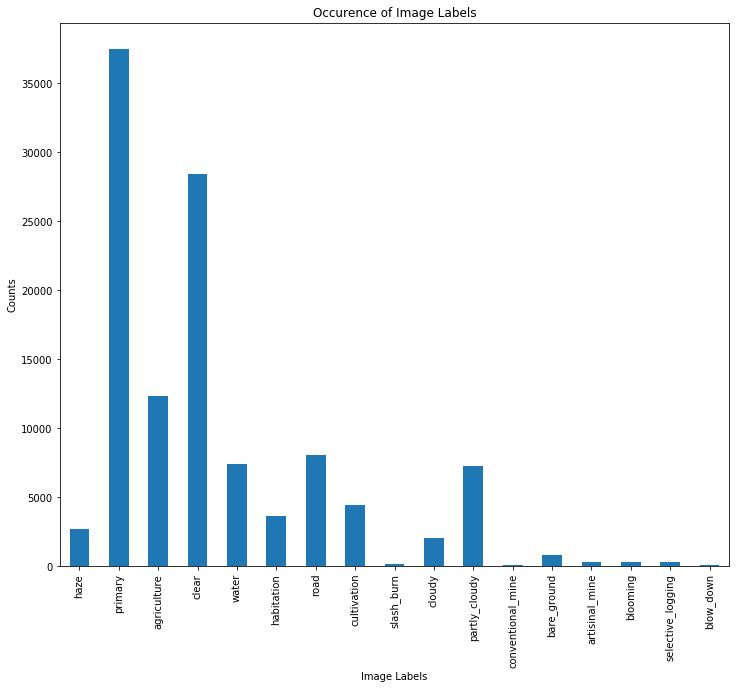

In [7]:
#Examing occurence of labels:
fig = train_labels[labels].sum().plot.bar(figsize=(12,10))
fig.set_ylabel('Counts')
fig.set_xlabel('Image Labels')
fig.set_title('Occurence of Image Labels');

In [8]:
train_labels[labels].sum()

haze                  2697
primary              37513
agriculture          12315
clear                28431
water                 7411
habitation            3660
road                  8071
cultivation           4477
slash_burn             209
cloudy                2089
partly_cloudy         7261
conventional_mine      100
bare_ground            862
artisinal_mine         339
blooming               332
selective_logging      340
blow_down               98
dtype: int64

In [8]:
pd.set_option("display.max_rows", 26, "display.max_columns", None)

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
haze,0,2670,672,0,613,129,394,202,3,0,0,2,41,5,4,5,0
primary,2670,0,11972,27668,7001,3469,7728,4455,209,0,7175,94,683,324,332,340,98
agriculture,672,11972,0,9150,2712,2737,6034,3377,119,0,2493,24,225,38,32,65,22
clear,0,27668,9150,0,5502,3090,6295,3527,173,0,0,70,747,307,311,308,85
water,613,7001,2712,5502,0,915,2125,868,24,0,1295,26,206,299,16,49,3
habitation,129,3469,2737,3090,915,0,2786,895,41,0,441,36,163,29,4,13,3
road,394,7728,6034,6295,2125,2786,0,1294,36,0,1382,59,323,110,10,151,2
cultivation,202,4455,3377,3527,868,895,1294,0,126,0,748,4,89,18,35,58,8
slash_burn,3,209,119,173,24,41,36,126,0,0,33,0,10,0,2,2,2
cloudy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


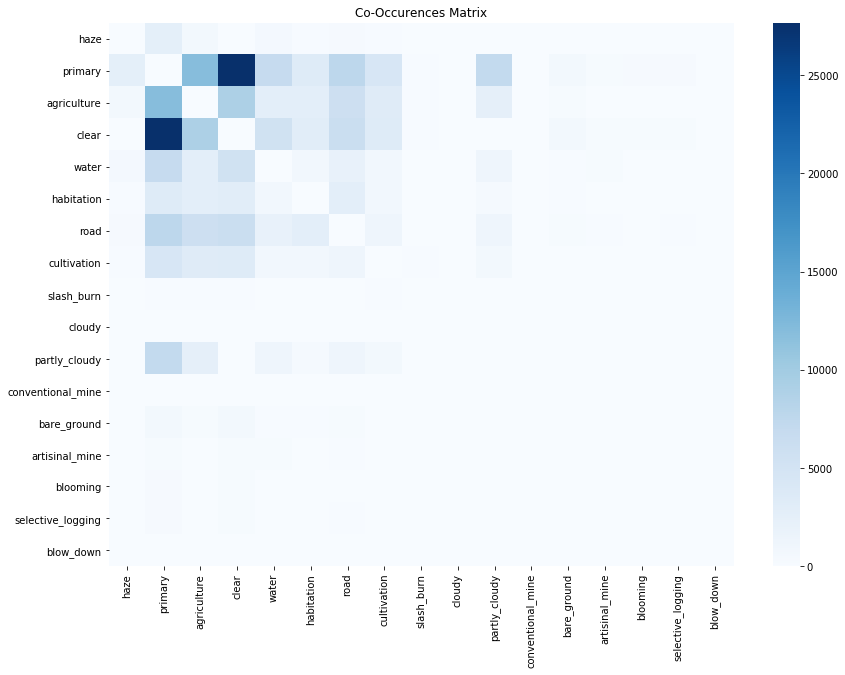

In [9]:
#Examining co-occurence of labels:

def co_occurence(labels):
    #occurences matrix
    oc_matrix = train_labels[labels]
    
    #co-occurrences matrix
    co_oc = oc_matrix.T.dot(oc_matrix)
    co_oc.values[[np.arange(co_oc.shape[0])]*2] = 0
    
    plt.figure(figsize=(14,10))
    sns.heatmap(co_oc, cmap ="Blues")
    plt.title('Co-Occurences Matrix')
    
    return co_oc

co_occurence(labels)

## Inspecting images

Raw images are 16-bit (from 0 to 65535), and contain red, green, blue, and an additional Near infrared (NIR) channel for the .tif files.

(256, 256, 3)


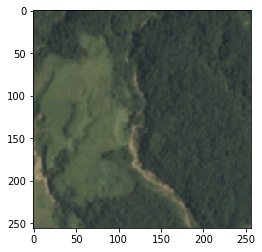

In [9]:
from IPython.display import display
from skimage import io


#Write function to get a specific image

def load_image(file_name, type='jpg'):
    img_path = ('./train-{}/{}.{}').format(type,file_name,type)
    img = io.imread(img_path)
    return img

image = load_image('train_1')
plt.imshow(image)
print(image.shape)

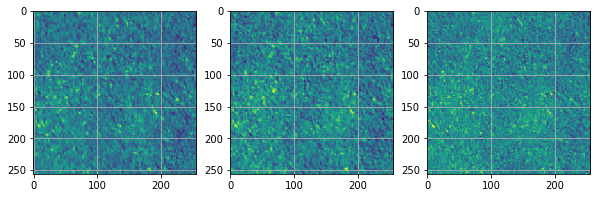

In [11]:
#Breaking down color channels
def extract_rgb(image):
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    return r, g, b

r, g, b = extract_rgb(image)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))

#Display all 3 channels
for ax, fig in zip(axs,[r,g,b]):
    ax.imshow(fig)
    ax.grid(True)

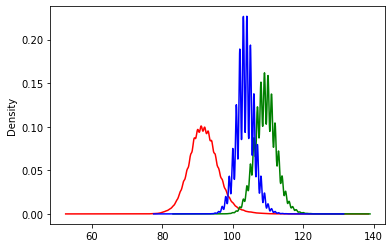

In [12]:
#Look at the kernel density estimate for each of the color channels on the same plot

# code adapted from DataCamp 'Image Loading and Processing' module
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r', 'g', 'b']
    
def plot_rgb(image):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(image[:, :, ix], color)

    plt.show()
    
plot_rgb(image)

## Find average RGB values for each category and each image

In [13]:
####### The code below was used to generate the file 'mean_RGB.csv'.###############################
####### Due to running time, the results are stored and directly read from a csv file ######################

image_names_dict={}

for label in labels:
    #gets the image names in the training set for each label
    image_names = train_labels[train_labels[label] == 1]['image_name']
    image_names_dict[label] = list(image_names.values)

# mean_rgb_label_dict = {} # stores mean RGB value per label type

# for label, image_names in image_names_dict.items():
#     reds = []
#     greens = []
#     blues = []
    
#     for image in image_names:
#         r, g, b = extract_rgb(load_image(image))
#         #section below calculates average R, G, B values for each image
#         red_mean = np.mean(r)
#         green_mean = np.mean(g)
#         blue_mean = np.mean(b)

#         reds.append(red_mean)
#         greens.append(green_mean)
#         blues.append(blue_mean)

#     #this section calculates overall R,G,B mean values for all images with the label    
#     red_mean = np.mean(reds)
#     green_mean = np.mean(greens)
#     blue_mean = np.mean(blues)
        
#     mean_rgb_label_dict[label]={'red':red_mean, 'green':green_mean, 'blue': blue_mean}
    
#     print(label)
    
# #print(mean_rgb_label_dict)

In [14]:
#mean_rgb_label_df = pd.DataFrame.from_dict(mean_rgb_label_dict).T
#mean_rgb_label_df.to_csv('mean_RGB.csv')

In [12]:
mean_rgb_df = pd.read_csv('mean_RGB.csv', index_col=0)
mean_rgb_df

,red,green,blue
haze,117.525876,123.862584,113.743337
primary,73.952000,82.099532,71.651709
agriculture,91.662682,95.120077,81.276080
clear,67.007102,75.176934,64.491544
water,90.529311,94.506187,82.300292
habitation,94.522138,95.868050,80.025285
road,95.612493,97.422968,82.537842
cultivation,73.998063,82.014014,70.711049
slash_burn,68.156260,76.948998,65.976992
cloudy,158.973362,160.025921,149.450716


In [16]:
# This section calculates average RGB values per image
####### Due to running time, the results are stored and directly read from a csv file ######################

# mean_rgb_images_dict = {} #stores mean RGB values per image

# for image in np.array(train_labels['image_name']):
#     r, g, b = extract_rgb(load_image(image))
#     #section below calculates average R, G, B values for each image
#     red_mean = np.mean(r)
#     green_mean = np.mean(g)
#     blue_mean = np.mean(b)

#     mean_rgb_images_dict[image]={'R':red_mean, 'G':green_mean, 'B': blue_mean}

In [17]:
# mean_rgb_images_df = pd.DataFrame.from_dict(mean_rgb_images_dict).T
# mean_rgb_images_df.to_csv('mean_RGB_images.csv')

In [13]:
mean_rgb_images_df = pd.read_csv('mean_RGB_images.csv', index_col=0)

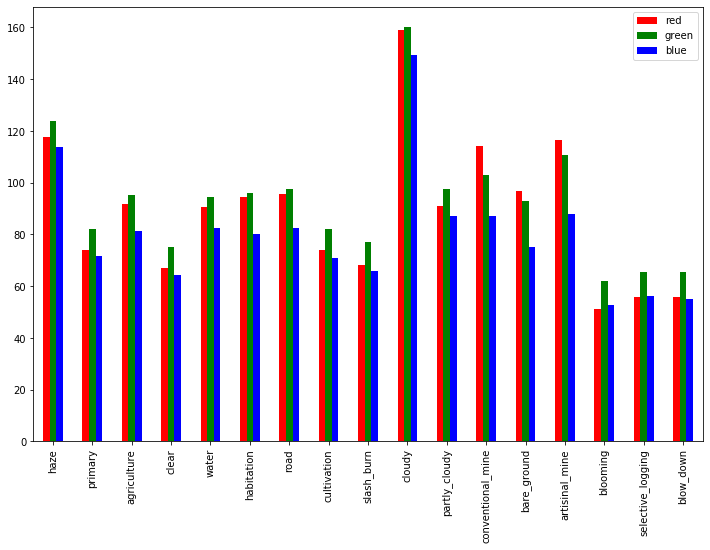

In [14]:
mean_rgb_df.plot(kind='bar', figsize=(12,8), color=['r','g','b']);

## Make average image for each category (pixel by pixel)

In [20]:
image_size = (256, 256, 3)
avg_image_dict = {}

for label, image_names in image_names_dict.items():
    # Create a numpy array of floats to store the average
    avg_image=np.zeros(image_size,np.float)

    for image in image_names:
        image_array = load_image(image)
        avg_image = avg_image + image_array
    
    num_images = len(image_names)
    avg_image_dict[label] = avg_image/num_images
    print('Processed label: ', label)

Processed label:  haze
Processed label:  primary


KeyboardInterrupt: 

In [ ]:
#### implement code to save images
#######

In [ ]:
import matplotlib.pyplot as plt
import math

nrow=5
ncol=4

_, ax = plt.subplots(nrow, ncol, figsize=(20, 20))
i = 0

for label, avg_image in avg_image_dict.items():
    #Display image and corresponding label
    avg_image = np.array(np.round(avg_image),dtype=np.uint8)
    row = math.floor(i/ncol)
    col = i - math.floor(i/ncol)*ncol
    ax[row,col].imshow(avg_image)
    ax[row,col].set_title(label)
    i += 1
    
plt.show()    

## Baseline RF model using average RGB values

In [15]:
mean_rgb_images_df.index.name = 'image_name'
mean_rgb_images_df

,R,G,B
image_name,,,
train_0,91.787384,109.347000,103.609146
train_1,65.639862,76.497375,64.301590
train_2,43.164474,58.039383,56.862000
train_3,51.411316,65.253769,53.972961
train_4,57.342377,45.253403,19.525055
...,...,...,...
train_40474,61.309784,68.352692,63.718872
train_40475,148.132324,151.763138,143.260849
train_40476,82.383011,64.913818,35.009766


In [16]:
#Adding back labels to average RGB data for each image
mean_rgb_images_df = mean_rgb_images_df.merge(train_labels, left_index=True, right_on='image_name')
mean_rgb_images_df.drop('tags', axis=1, inplace=True)

In [17]:
mean_rgb_images_df

,R,G,B,image_name,haze,primary,agriculture,clear,water,habitation,...,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,91.787384,109.347000,103.609146,train_0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65.639862,76.497375,64.301590,train_1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,43.164474,58.039383,56.862000,train_2,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,51.411316,65.253769,53.972961,train_3,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,57.342377,45.253403,19.525055,train_4,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40474,61.309784,68.352692,63.718872,train_40474,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40475,148.132324,151.763138,143.260849,train_40475,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
40476,82.383011,64.913818,35.009766,train_40476,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
40477,135.358322,130.774521,106.563263,train_40477,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score
import time

#subset data for testing the code and finding best params
mean_rgb_images_subset = mean_rgb_images_df.iloc[:27000,:]

#Splitting target and features
X = mean_rgb_images_subset[['R','G','B']]
y = mean_rgb_images_subset.drop(['R','G','B','image_name'],axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

###########################################################################
# #Instantiate the model
# rfm = RandomForestClassifier()

# #Tuning parameters and performing cross-validation
# # Setup the hyperparameter grid
# n_estimators = np.arange(100, 400, 100)#number of trees in Forest
# max_depth = np.arange(1,12)#depth of trees
# param_grid = {'n_estimators': n_estimators, 'max_depth':max_depth}

# # Instantiate the GridSearchCV object: rf_cv
# rf_cv = GridSearchCV(rfm, param_grid, cv=5, scoring='f1_samples')

# #Fitting the model
# rf_cv.fit(X_train, y_train)

# print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_)) 
# print("Best score is {}".format(rf_cv.best_score_))

# Tuned Random Forest Parameters: {'max_depth': 10, 'n_estimators': 200}
# Best score is 0.7207079883079882

#####################################################################

start_time = time.time()
#Instantiate model with best parameters from GridSearchCV
rfm = RandomForestClassifier(max_depth=10, n_estimators=200)

#Fitting the model
rfm.fit(X_train, y_train)

y_pred = rfm.predict(X_test)

end_time = time.time()

# Scoring with F beta
print('F beta score:', fbeta_score(np.asarray(y_test), y_pred, beta=2, average='samples'))
print(str((end_time-start_time))+' secs')

F beta score: 0.7048060341480202
17.615888595581055 secs


C:\Users\isado\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [34]:
from sklearn.metrics import recall_score, precision_score, f1_score

resulting_metrics = pd.DataFrame(recall_score(y_test, y_pred, average=None))
resulting_metrics.index = labels
resulting_metrics.columns = ['Recall']
resulting_metrics["Precision"] = precision_score(y_test, y_pred, average=None)
resulting_metrics['F1'] = f1_score(y_test, y_pred, average=None)
resulting_metrics

C:\Users\isado\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\isado\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Recall,Precision,F1
haze,0.039813,0.548387,0.074236
primary,0.988687,0.956234,0.972190
agriculture,0.494366,0.657329,0.564318
clear,0.938177,0.831550,0.881651
water,0.026211,0.660000,0.050420
habitation,0.014196,0.818182,0.027907
road,0.278067,0.617162,0.383393
cultivation,0.000000,0.000000,0.000000
slash_burn,0.000000,0.000000,0.000000
cloudy,0.520958,0.746781,0.613757
